In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/nagarjuna843/Decision-Tree/main/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
inputs=df.drop(['salary_more_then_100k'],axis='columns')
target=df['salary_more_then_100k']

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [5]:
inputs['company_n']=LabelEncoder().fit_transform(inputs['company'])
inputs['Job_n']=LabelEncoder().fit_transform(inputs['job'])
inputs['degree_n']=LabelEncoder().fit_transform(inputs['degree'])

In [6]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,Job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
model=tree.DecisionTreeClassifier()

In [8]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [9]:
model.score(inputs_n,target)

1.0

In [10]:
model.predict([[1,1,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

[Text(334.8, 498.3, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(167.4, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(83.7, 317.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 317.1, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(502.20000000000005, 407.70000000000005, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(418.5, 317.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(585.9, 317.1, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(502.20000000000005, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(669.6, 226.5, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(585.9, 135.89999999999998, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(502.20000000000005, 45.299999999999955, 'gini =

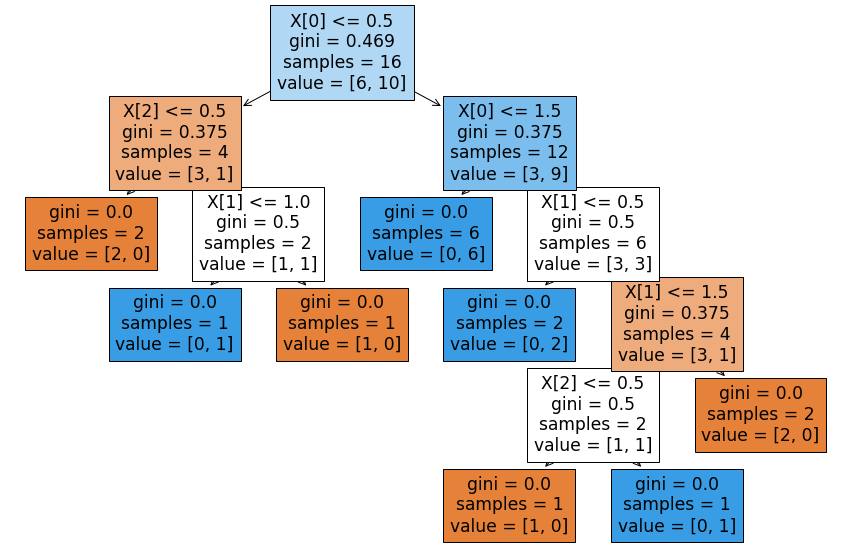

In [11]:
clf=model.fit(inputs_n,target)
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [12]:
feature_importance=pd.DataFrame(model.feature_importances_,inputs_n.columns,columns=['Importance'])
feature_importance.sort_values('Importance',ascending=False).round(2)

,Importance
company_n,0.4
Job_n,0.4
degree_n,0.2


In [13]:
predict=model.predict(inputs_n)
output=pd.DataFrame({'company':df.company,'job':df.job,'degree':df.degree,'salary_more_then_100k_actual':df.salary_more_then_100k,'salary_more_then_100k_predicted':predict})
output

,company,job,degree,salary_more_then_100k_actual,salary_more_then_100k_predicted
0,google,sales executive,bachelors,0,0
1,google,sales executive,masters,0,0
2,google,business manager,bachelors,1,1
3,google,business manager,masters,1,1
4,google,computer programmer,bachelors,0,0
5,google,computer programmer,masters,1,1
6,abc pharma,sales executive,masters,0,0
7,abc pharma,computer programmer,bachelors,0,0
8,abc pharma,business manager,bachelors,0,0
9,abc pharma,business manager,masters,1,1
